In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.load("digits.npz")
X_train = data["train_data"]
y_train = data["train_labels"]
X_test = data["test_data"]
y_test = data["test_labels"]

In [4]:
y_train

array([4, 2, 4, ..., 5, 7, 1], dtype=uint8)

In [5]:
X_train.shape,X_test.shape

((8633, 21, 21), (2159, 21, 21))

In [6]:
y_train.shape,y_test.shape

((8633,), (2159,))

In [7]:
y_test = np.array([img.split("\\")[-2] for img in y_test]).astype("uint8")

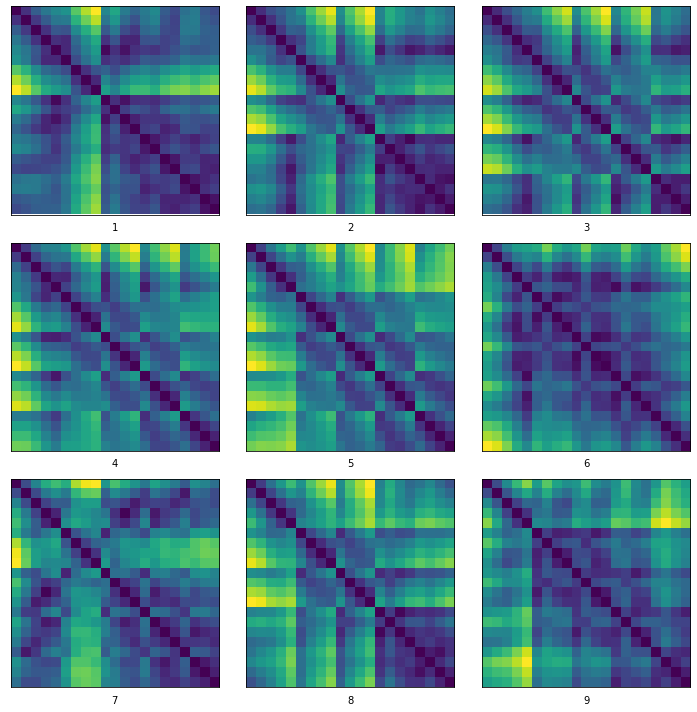

In [8]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xlabel(i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[np.where(y_train == (i+1))[0][0]])
plt.tight_layout()

In [9]:
X_train = X_train.reshape(X_train.shape[0],21*21)
X_test = X_test.reshape(X_test.shape[0],21*21)

In [10]:
X_train.shape,X_test.shape

((8633, 441), (2159, 441))

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]   
}


In [16]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5,verbose=5)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .......max_depth=2, n_estimators=5;, score=0.997 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=5;, score=0.781 total time=   0.0s
[CV 3/5] END .......max_depth=2, n_estimators=5;, score=0.778 total time=   0.0s
[CV 4/5] END .......max_depth=2, n_estimators=5;, score=0.889 total time=   0.0s
[CV 5/5] END .......max_depth=2, n_estimators=5;, score=0.669 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/5] END ......max_depth=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/5] END ......max_depth=2, n_estimators=10;, score=0.997 total time=   0.1s
[CV 4/5] END ......max_depth=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 5/5] END ......max_depth=2, n_estimators=10;, score=0.999 total time=   0.1s
[CV 1/5] END ......max_depth=2, n_estimators=50;, score=1.000 total time=   0.7s
[CV 2/5] END ......max_depth=2, n_estimators=50

[CV 2/5] END ......max_depth=32, n_estimators=5;, score=1.000 total time=   0.1s
[CV 3/5] END ......max_depth=32, n_estimators=5;, score=1.000 total time=   0.1s
[CV 4/5] END ......max_depth=32, n_estimators=5;, score=1.000 total time=   0.1s
[CV 5/5] END ......max_depth=32, n_estimators=5;, score=0.999 total time=   0.1s
[CV 1/5] END .....max_depth=32, n_estimators=10;, score=1.000 total time=   0.2s
[CV 2/5] END .....max_depth=32, n_estimators=10;, score=1.000 total time=   0.2s
[CV 3/5] END .....max_depth=32, n_estimators=10;, score=1.000 total time=   0.2s
[CV 4/5] END .....max_depth=32, n_estimators=10;, score=1.000 total time=   0.2s
[CV 5/5] END .....max_depth=32, n_estimators=10;, score=1.000 total time=   0.2s
[CV 1/5] END .....max_depth=32, n_estimators=50;, score=1.000 total time=   1.5s
[CV 2/5] END .....max_depth=32, n_estimators=50;, score=1.000 total time=   1.7s
[CV 3/5] END .....max_depth=32, n_estimators=50;, score=1.000 total time=   1.5s
[CV 4/5] END .....max_depth=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]},
             verbose=5)

In [17]:
cv.best_params_

{'max_depth': 8, 'n_estimators': 10}

model = Sequential([
    layers.Dense(64,activation='relu',input_shape = (21*21,)),
    layers.Dense(64,activation='relu',input_shape = (21*21,)),
    layers.Dense(9,activation='softmax')    
])

model.summary()

X_train.shape,X_test.shape

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [18]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=8)

In [19]:
model = rfc.fit(X_train,y_train)

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array([5, 3, 4, ..., 3, 7, 7], dtype=uint8)

In [22]:
y_test

array([5, 3, 4, ..., 3, 7, 7], dtype=uint8)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[262,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 228,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 243,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 239,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 238,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 244,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 223,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 236,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 245]], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred)

0.999536822603057

In [27]:
X_test[0].ndim

1

In [29]:
import pickle
# now you can save it to a file
with open('digits_classifier2.pkl', 'wb') as f:
    pickle.dump(model, f)